In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from matplotlib.font_manager import FontProperties 
import missingno
import numpy
import seaborn as sns

In [2]:
C1_to_C2 = pd.read_excel('CalcI-CalcII-Data.xlsx')
AllCalc = pd.read_excel('AllCalcData.xlsx')

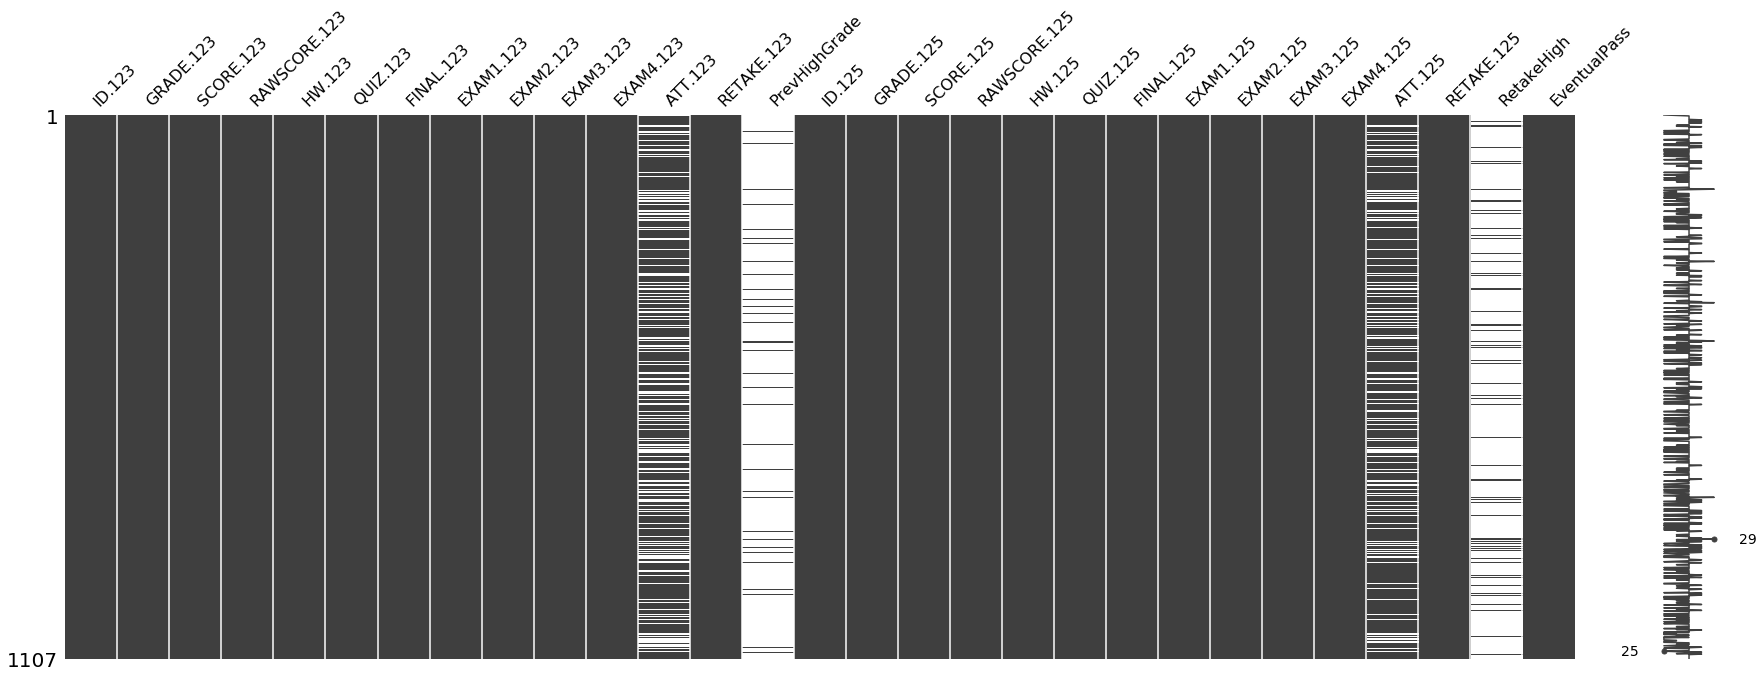

In [3]:
missingno.matrix(C1_to_C2, figsize = (30,10))
plt.show()

Students with a D grade in Math 123 have poor outcomes (D or F) in Math 125

- Boxplot to show the count of the grades for students with a D in 123


In [4]:
math123_D = C1_to_C2[C1_to_C2['GRADE.123'] == 'D']

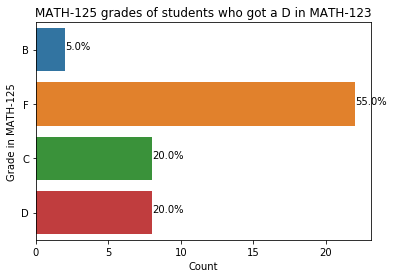

In [5]:
ax = sns.countplot(y = 'GRADE.125', data = math123_D)
plt.ylabel('Grade in MATH-125')
plt.xlabel('Count')
plt.title('MATH-125 grades of students who got a D in MATH-123')

total = len(math123_D['GRADE.125'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))

plt.show()

In [6]:
# Exam 1 Mean and Median
mean_E1_D = numpy.mean(math123_D['EXAM1.125'])
median_E1_D = numpy.median(math123_D['EXAM1.125'])
print('EXAM 1 MEAN:', mean_E1_D)
print('EXAM 1 MEDIAN:', median_E1_D,'\n')
#Exam 2 Mean and Median
mean_E2_D = numpy.mean(math123_D['EXAM2.125'])
median_E2_D = numpy.median(math123_D['EXAM2.125'])
print('EXAM 2 MEAN:', mean_E2_D)
print('EXAM 2 MEDIAN:', median_E2_D,'\n')
# Exam 3 Mean and Median
mean_E3_D = numpy.mean(math123_D['EXAM3.125'])
median_E3_D = numpy.median(math123_D['EXAM3.125'])
print('EXAM 3 MEAN:', mean_E3_D)
print('EXAM 3 MEDIAN:', median_E3_D,'\n')
# Exam 4 Mean and Median
mean_E4_D = numpy.mean(math123_D['EXAM4.125'])
median_E4_D = numpy.median(math123_D['EXAM4.125'])
print('EXAM 4 MEAN:', mean_E4_D)
print('EXAM 4 MEDIAN',median_E4_D,'\n')
# Final Exam Mean and Median
mean_FE_D = numpy.mean(math123_D['FINAL.125'])
median_FE_D = numpy.median(math123_D['FINAL.125'])
print('FINAL MEAN:', mean_FE_D)
print('FINAL MEDIAN:', median_FE_D)

EXAM 1 MEAN: 48.579250000000016
EXAM 1 MEDIAN: 56.25 

EXAM 2 MEAN: 58.18474999999999
EXAM 2 MEDIAN: 65.255 

EXAM 3 MEAN: 49.81199999999998
EXAM 3 MEDIAN: 51.47 

EXAM 4 MEAN: 49.60950000000001
EXAM 4 MEDIAN 56.25 

FINAL MEAN: 39.58800000000001
FINAL MEDIAN: 48.510000000000005


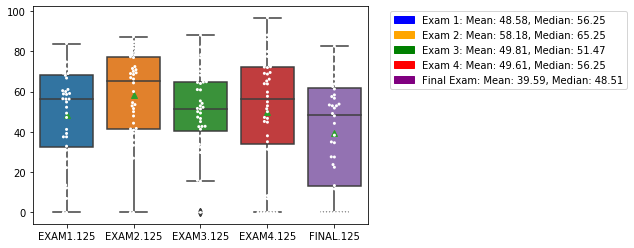

In [7]:
sns.boxplot(data=math123_D.iloc[:,20:25], showmeans = True, order = ['EXAM1.125','EXAM2.125','EXAM3.125','EXAM4.125','FINAL.125'])
sns.swarmplot(data=math123_D.iloc[:,20:25], color = 'white', size = 3
            ,order = ['EXAM1.125','EXAM2.125','EXAM3.125','EXAM4.125','FINAL.125'])
# Creating patches for the legend
blue_patch = mpatches.Patch(color = 'blue', label = 'Exam 1: Mean: %.2f, Median: %.2f' % (mean_E1_D,median_E1_D))
orange_patch = mpatches.Patch(color = 'orange', label = 'Exam 2: Mean: %.2f, Median: %.2f' % (mean_E2_D,median_E2_D))
green_patch = mpatches.Patch(color = 'green', label = 'Exam 3: Mean: %.2f, Median: %.2f' % (mean_E3_D,median_E3_D))
red_patch = mpatches.Patch(color = 'red', label = 'Exam 4: Mean: %.2f, Median: %.2f' % (mean_E4_D,median_E4_D))
purple_patch = mpatches.Patch(color = 'purple', label = 'Final Exam: Mean: %.2f, Median: %.2f' % (mean_FE_D,median_FE_D))

fontP = FontProperties()
fontP.set_size('medium')

plt.legend(handles =[blue_patch, orange_patch, green_patch, red_patch, purple_patch], bbox_to_anchor = (1.05,1), loc = 'upper left', prop = fontP)
plt.show()

Students with a C grade in Math 123 at high risk of a poor outcome in Math 125

In [8]:
math123_C = C1_to_C2[C1_to_C2['GRADE.123'] == 'C']

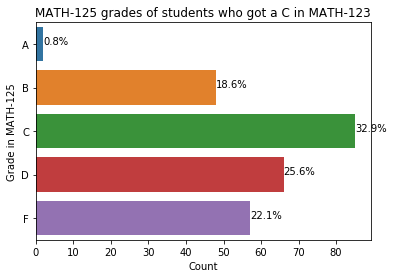

In [9]:
ax = sns.countplot(y = 'GRADE.125', data = math123_C, order=['A','B','C','D','F'])
plt.ylabel('Grade in MATH-125')
plt.xlabel('Count')
plt.title('MATH-125 grades of students who got a C in MATH-123')

total = len(math123_C['GRADE.125'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))

plt.show()

In [10]:
math123_A_B = C1_to_C2[(C1_to_C2['GRADE.123'] == 'A') | (C1_to_C2['GRADE.123'] == 'B')]

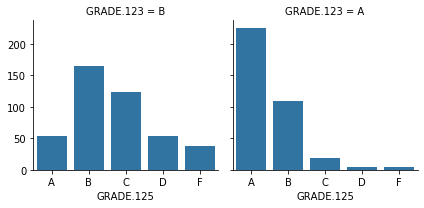

In [11]:
grid = sns.FacetGrid(math123_A_B, col = 'GRADE.123')
grid.map(sns.countplot, 'GRADE.125', order=['A','B','C','D','F'])
plt.show()

In [12]:
C1_to_C2['DIFF'] = C1_to_C2['SCORE.125'] - C1_to_C2['SCORE.123']


In [13]:
C1_to_C2[['SCORE.123','SCORE.125','DIFF']]
print(np.mean(C1_to_C2['DIFF']))
print(np.std(C1_to_C2['DIFF']))

-7.24674796747967
13.632890183449893


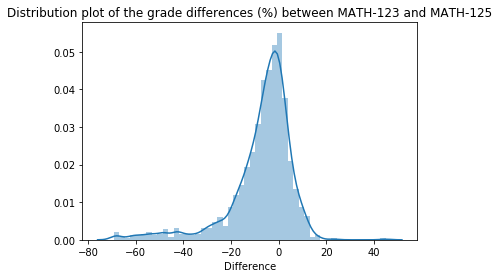

In [14]:
sns.distplot(C1_to_C2['DIFF'])
plt.title('Distribution plot of the grade differences (%) between MATH-123 and MATH-125')
plt.xlabel('Difference')
plt.show()

In [15]:
C1_Exams_mean = []
C1_Exams_std = []
for n in range(6,11):
    C1_Exams_mean.append(C1_to_C2.iloc[:,n].mean())
    C1_Exams_std.append(C1_to_C2.iloc[:,n].std())
    
C2_Exams_means = []
C2_Exams_std = []
for n in range(20,25):
    C2_Exams_means.append(C1_to_C2.iloc[:,n].mean())
    C2_Exams_std.append(C1_to_C2.iloc[:,n].std())

In [16]:
N = 5
ind = np.arange(N)
width = 0.85

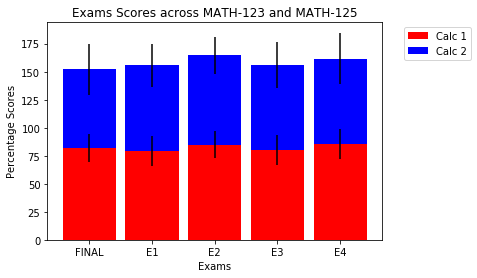

In [17]:
p1 = plt.bar(ind, C1_Exams_mean, width, yerr = C1_Exams_std, color = 'red')
p2 = plt.bar(ind, C2_Exams_means, width, yerr = C2_Exams_std, 
             color = 'blue', bottom = C1_Exams_mean)
plt.xlabel('Exams')
plt.ylabel('Percentage Scores')
plt.title('Exams Scores across MATH-123 and MATH-125')
plt.xticks(ind, ('FINAL', 'E1', 'E2','E3','E4'))
plt.legend((p1[0],p2[0]), ('Calc 1','Calc 2'), bbox_to_anchor = (1.05,1), loc = 'upper left', prop = fontP)
plt.show()

Question 3

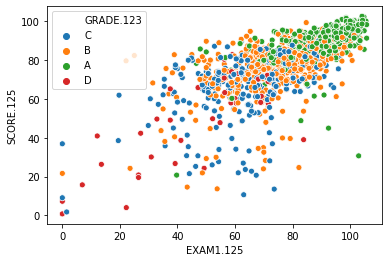

In [18]:
sns.scatterplot(data=C1_to_C2[(C1_to_C2['GRADE.123'] == 'A') | (C1_to_C2['GRADE.123'] == 'B') | (C1_to_C2['GRADE.123'] == 'C') | (C1_to_C2['GRADE.123'] == 'D')], x="EXAM1.125", y="SCORE.125", hue='GRADE.123')

In [19]:
question_3_df= C1_to_C2[(C1_to_C2['GRADE.123'] == 'A') | (C1_to_C2['GRADE.123'] == 'B') | (C1_to_C2['GRADE.123'] == 'C') | (C1_to_C2['GRADE.123'] == 'D') & (C1_to_C2['SCORE.125'] <= C1_to_C2['SCORE.123'])]

In [20]:
question_3_df.iloc[:,20]

0       58.30
1       34.83
2       81.25
3       97.92
4       77.92
        ...  
1102    58.33
1103    77.50
1104    91.67
1105    93.33
1106    84.17
Name: FINAL.125, Length: 1084, dtype: float64

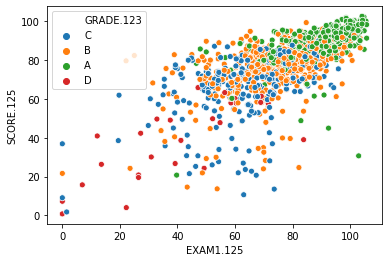

In [21]:
sns.scatterplot(data=question_3_df, x="EXAM1.125", y="SCORE.125", hue='GRADE.123')

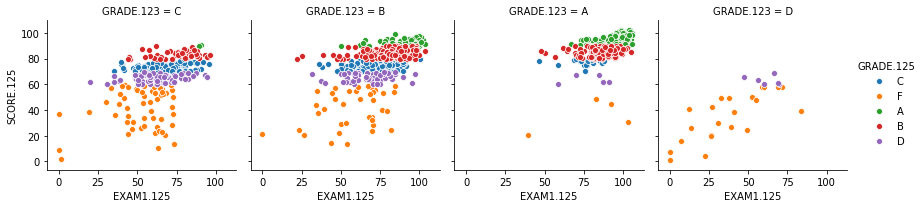

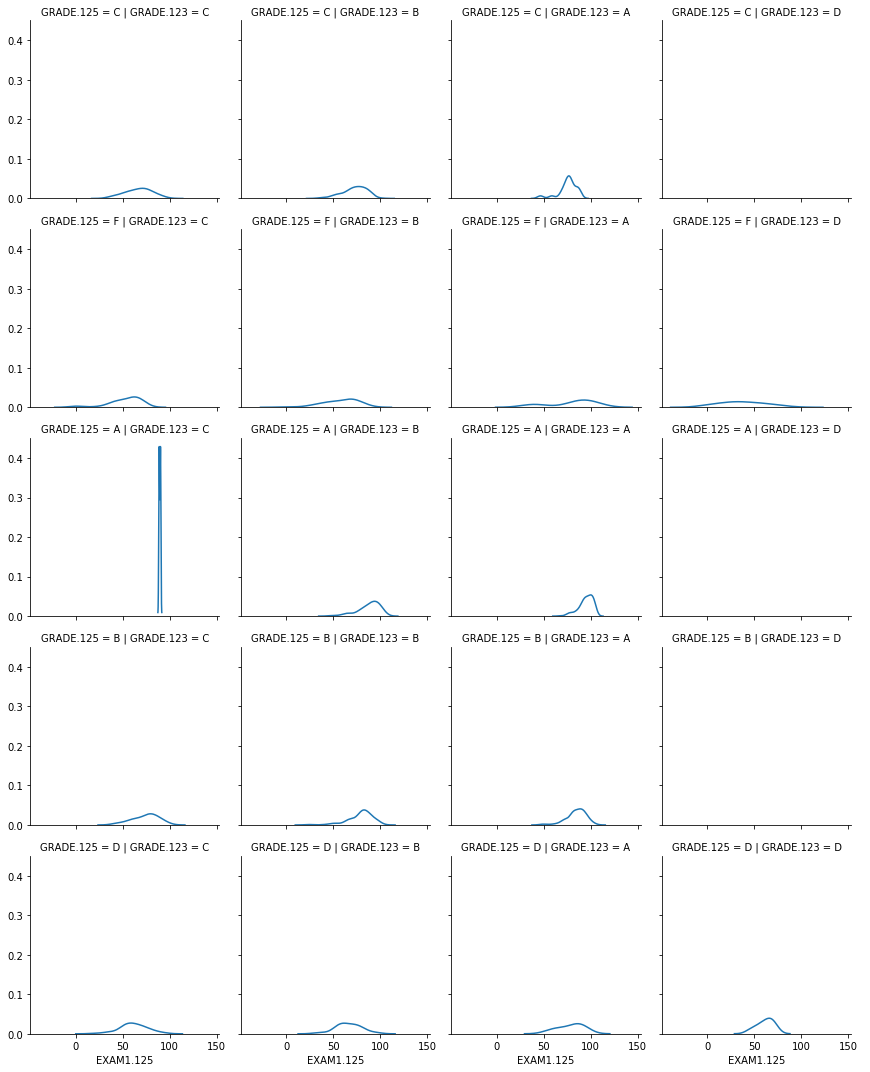

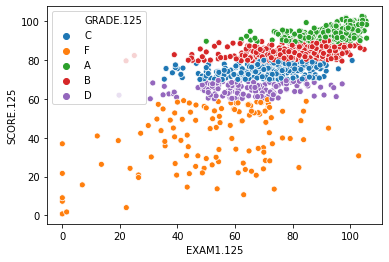

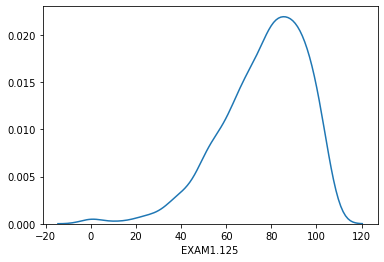

In [22]:
grid = sns.FacetGrid(question_3_df, col = 'GRADE.123', hue = 'GRADE.125')
grid.map(sns.scatterplot, 'EXAM1.125', 'SCORE.125')
grid.add_legend()
plt.show()
grid = sns.FacetGrid(question_3_df, col = 'GRADE.123', row = 'GRADE.125')
grid.map(sns.distplot, 'EXAM1.125', bins = 2, hist = False)
grid.add_legend()
plt.show()


sns.scatterplot(data=question_3_df, x="EXAM1.125", y="SCORE.125", hue='GRADE.125')
plt.show()
sns.distplot(question_3_df['EXAM1.125'], bins = 10, hist= False)
plt.show()

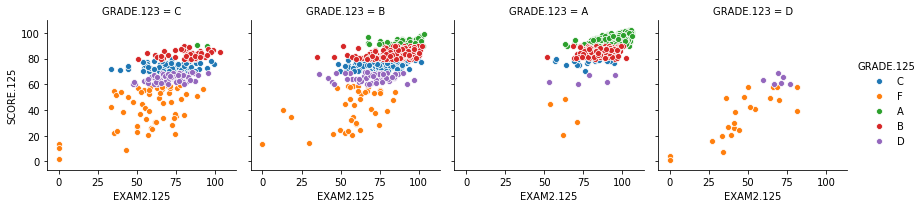

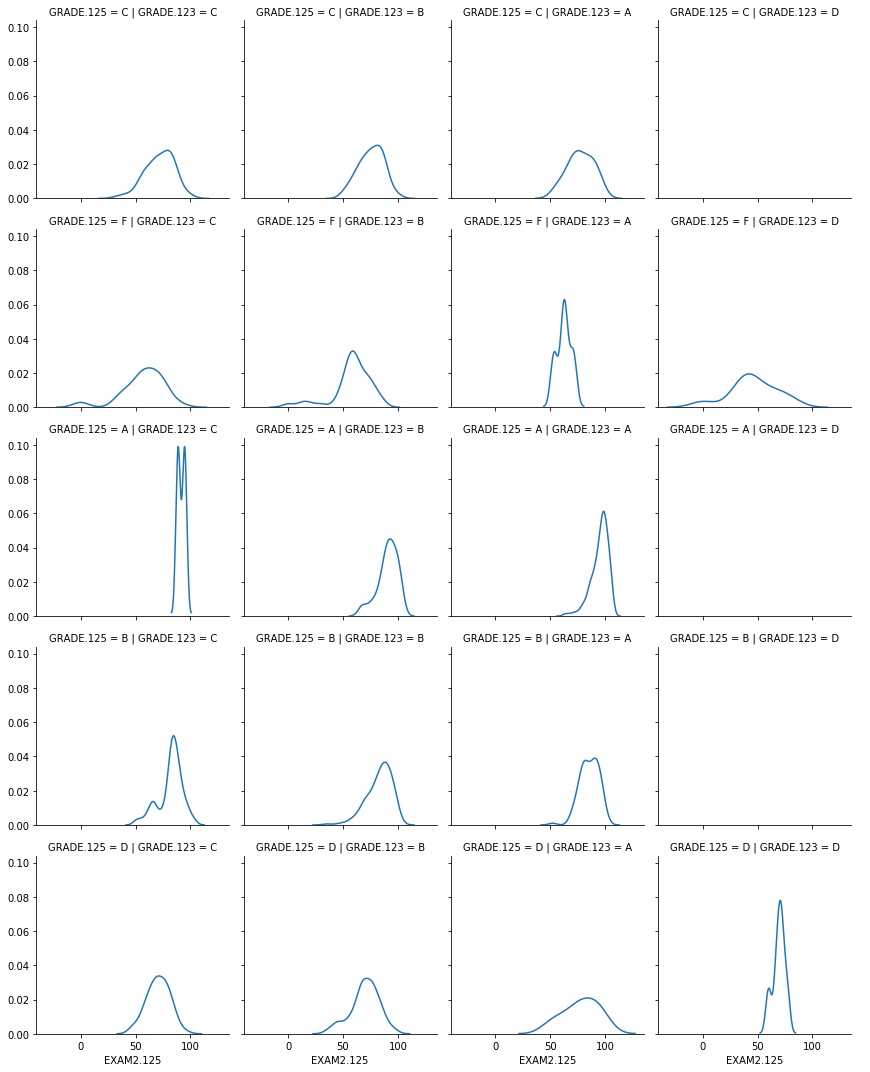

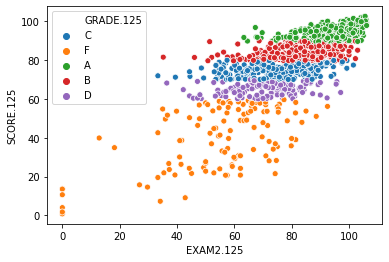

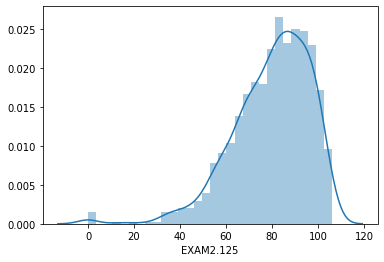

In [23]:
grid = sns.FacetGrid(question_3_df, col = 'GRADE.123', hue = 'GRADE.125')
grid.map(sns.scatterplot, 'EXAM2.125', 'SCORE.125')
grid.add_legend()
plt.show()
grid = sns.FacetGrid(question_3_df, col = 'GRADE.123', row = 'GRADE.125')
grid.map(sns.distplot, 'EXAM2.125', bins = 2, hist = False)
grid.add_legend()
plt.show()

sns.scatterplot(data=question_3_df, x="EXAM2.125", y="SCORE.125", hue='GRADE.125')
plt.show()
sns.distplot(question_3_df['EXAM2.125'], bins = 30)
plt.show()


- Students w

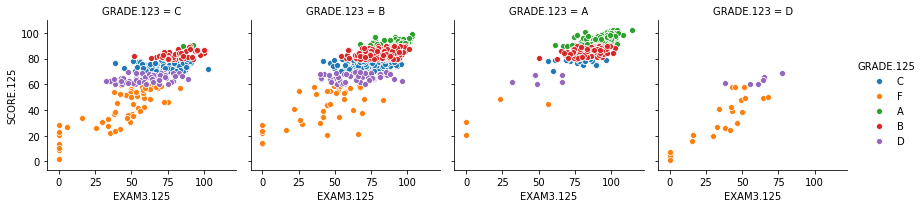

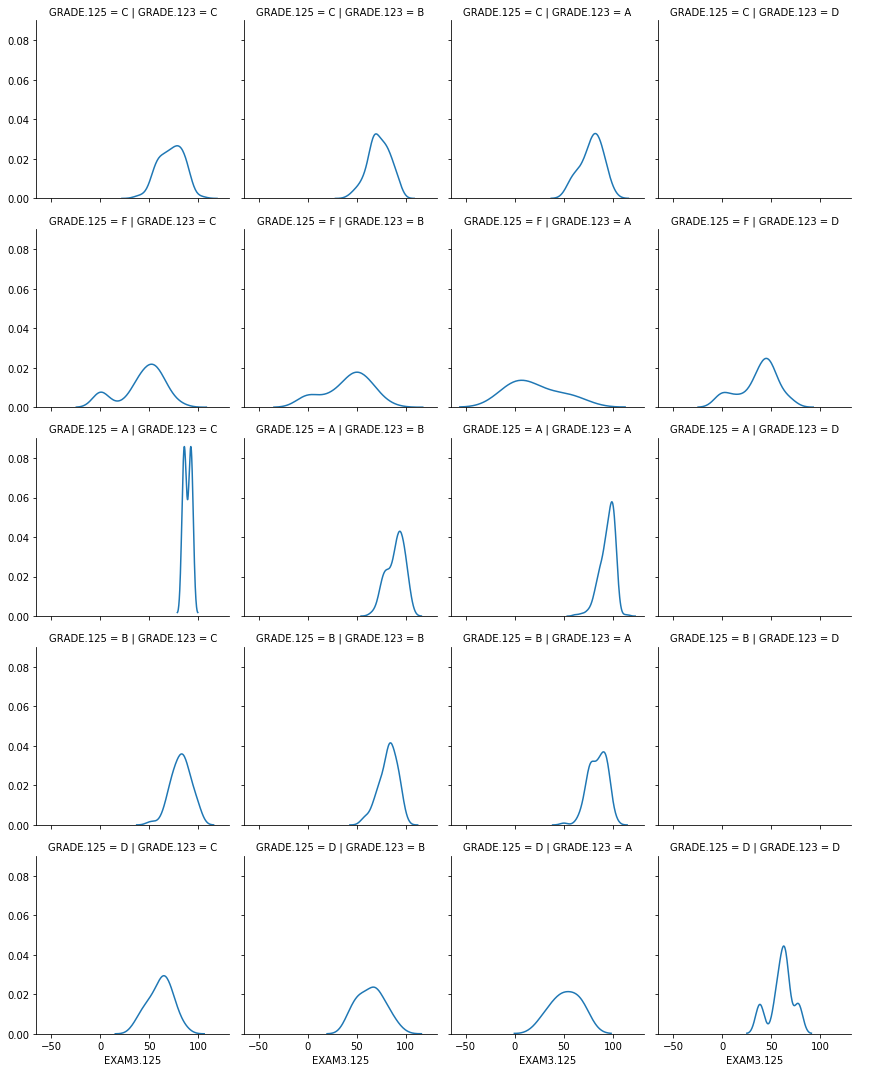

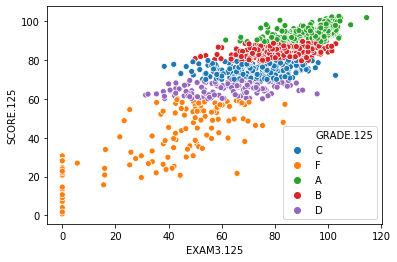

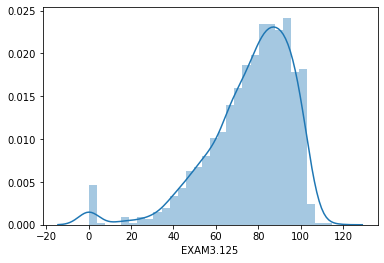

In [24]:
grid = sns.FacetGrid(question_3_df, col = 'GRADE.123', hue = 'GRADE.125')
grid.map(sns.scatterplot, 'EXAM3.125', 'SCORE.125')
grid.add_legend()
plt.show()
grid = sns.FacetGrid(question_3_df, col = 'GRADE.123', row = 'GRADE.125')
grid.map(sns.distplot, 'EXAM3.125', bins = 2, hist = False)
grid.add_legend()
plt.show()

sns.scatterplot(data=question_3_df, x="EXAM3.125", y="SCORE.125", hue='GRADE.125')
plt.show()
sns.distplot(question_3_df['EXAM3.125'], bins = 30)
plt.show()

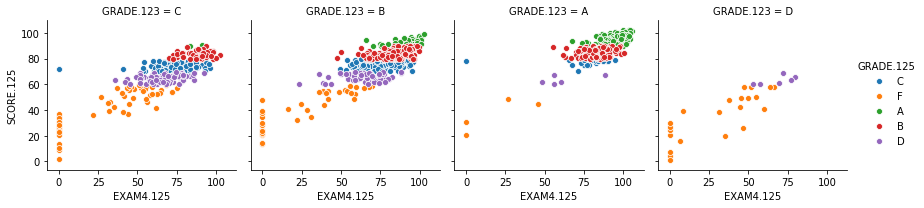

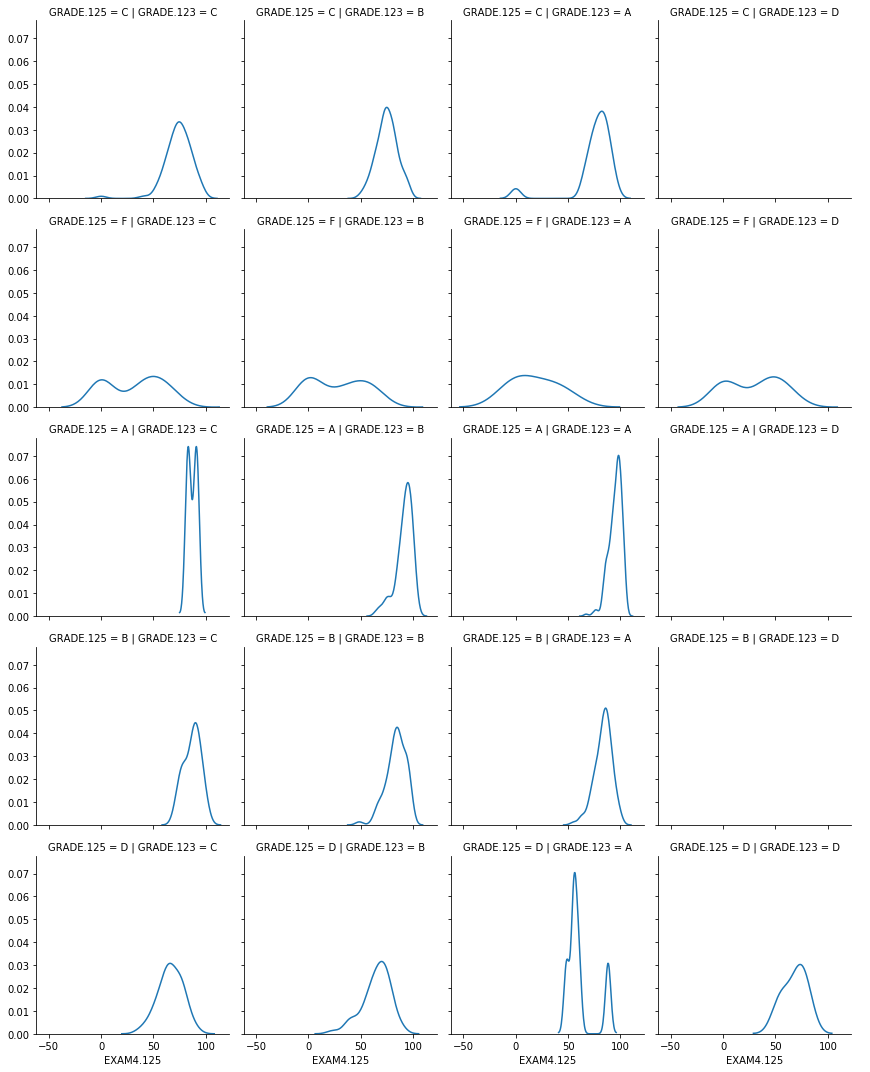

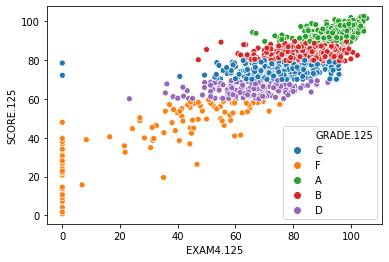

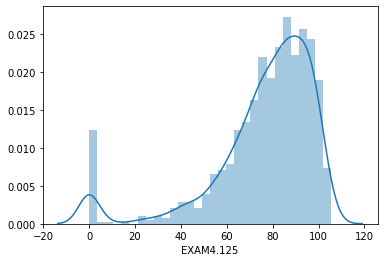

In [25]:
grid = sns.FacetGrid(question_3_df, col = 'GRADE.123', hue = 'GRADE.125')
grid.map(sns.scatterplot, 'EXAM4.125', 'SCORE.125')
grid.add_legend()
plt.show()
grid = sns.FacetGrid(question_3_df, col = 'GRADE.123', row = 'GRADE.125')
grid.map(sns.distplot, 'EXAM4.125', bins = 2, hist = False)
grid.add_legend()
plt.show()

sns.scatterplot(data=question_3_df, x="EXAM4.125", y="SCORE.125", hue='GRADE.125')
plt.show()
sns.distplot(question_3_df['EXAM4.125'], bins = 30)
plt.show()

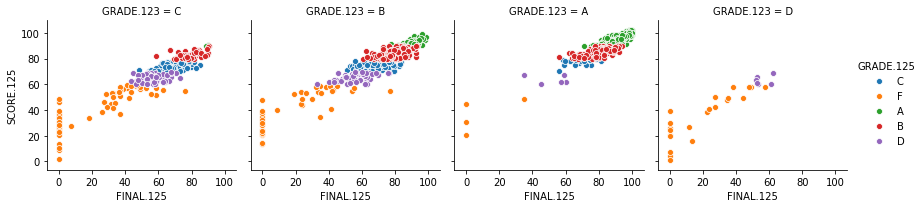

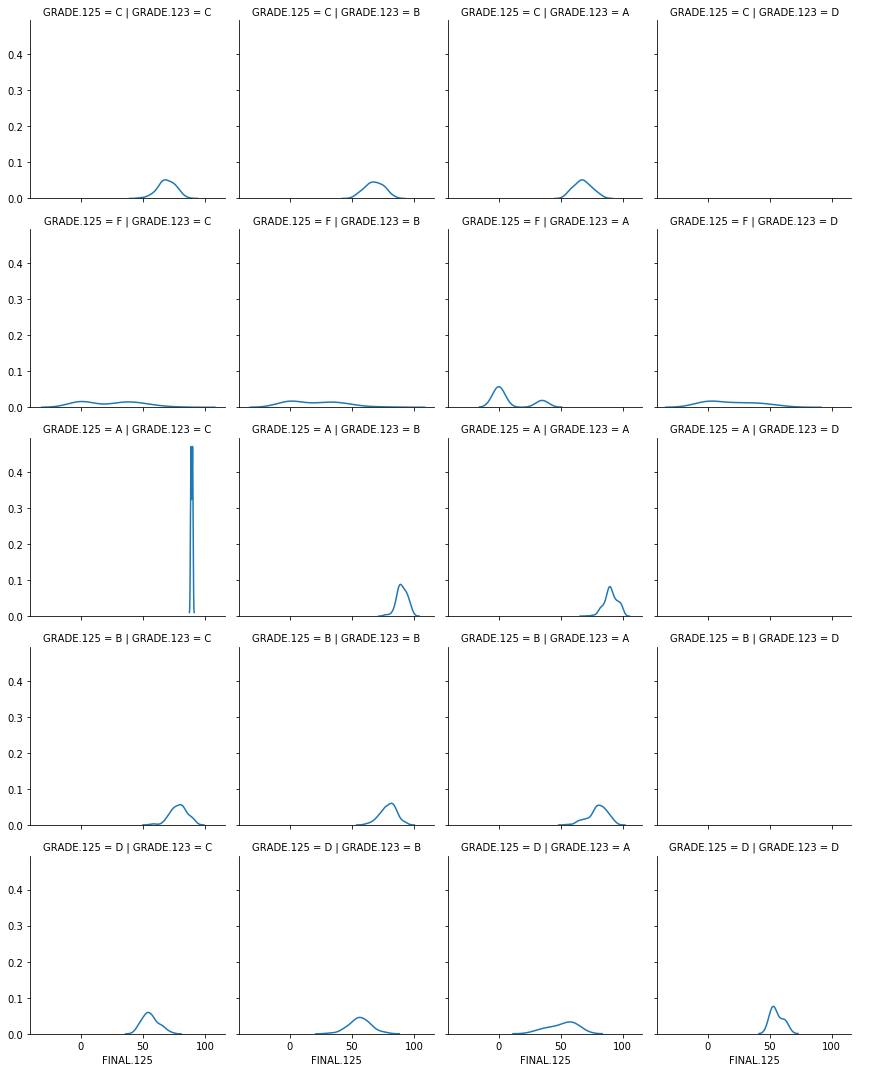

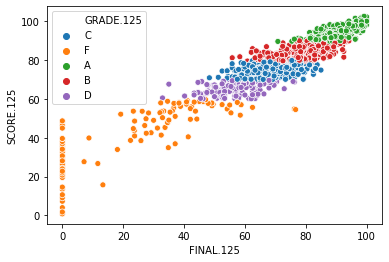

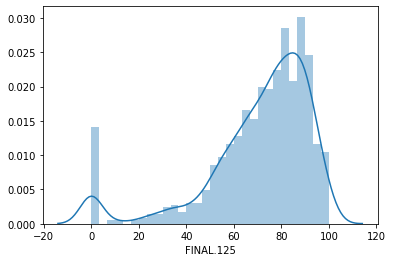

In [26]:
grid = sns.FacetGrid(question_3_df, col = 'GRADE.123', hue = 'GRADE.125')
grid.map(sns.scatterplot, 'FINAL.125', 'SCORE.125')
grid.add_legend()
plt.show()
grid = sns.FacetGrid(question_3_df, col = 'GRADE.123', row = 'GRADE.125')
grid.map(sns.distplot, 'FINAL.125', bins = 2, hist = False)
grid.add_legend()
plt.show()

sns.scatterplot(data=question_3_df, x="FINAL.125", y="SCORE.125", hue='GRADE.125')
plt.show()
sns.distplot(question_3_df['FINAL.125'], bins = 30)
plt.show()

- Next step I think is to compare all regression charts (A to B,C,D,F; B to C,D,F; etc) to the main data set
- Find the average exam scores and Standard Dev. of the entire population, and compare them to the regression charts' averages and Stadard Deviations

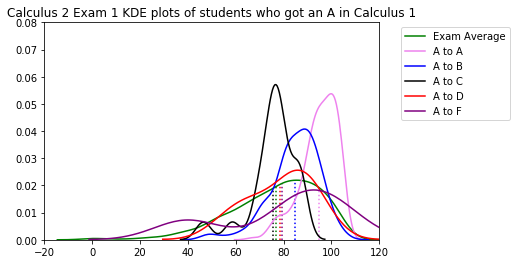

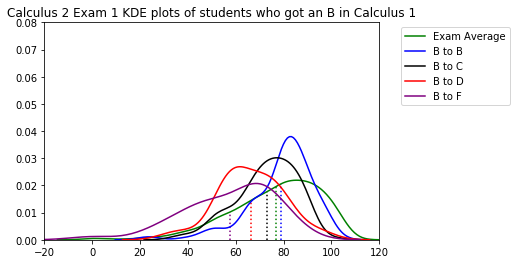

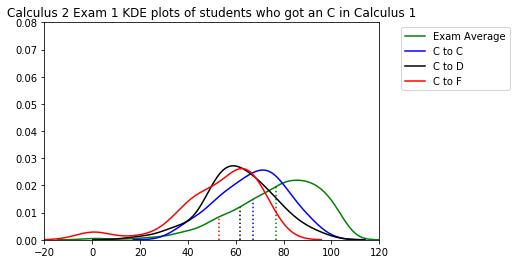

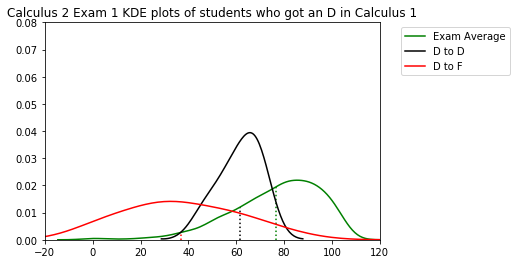

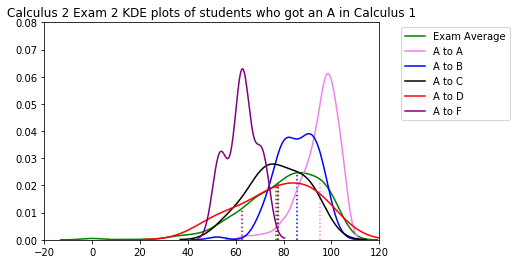

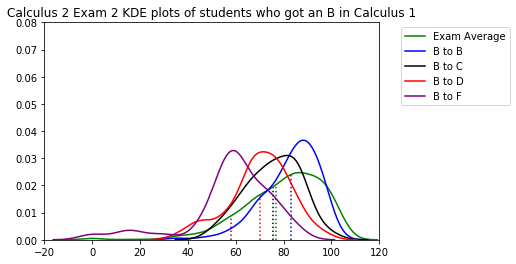

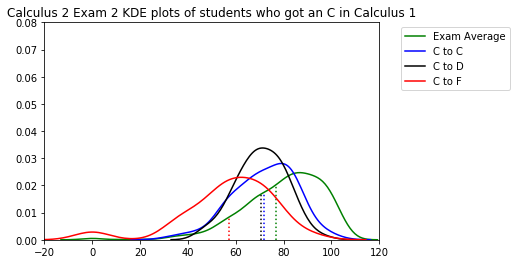

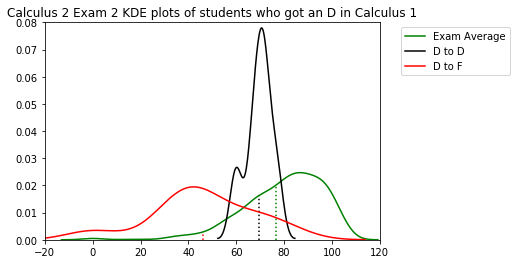

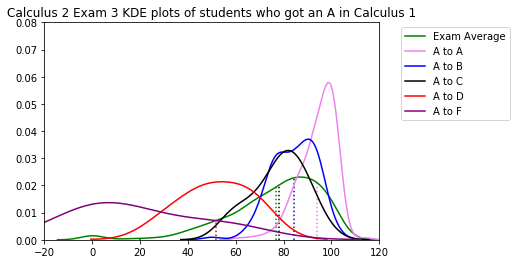

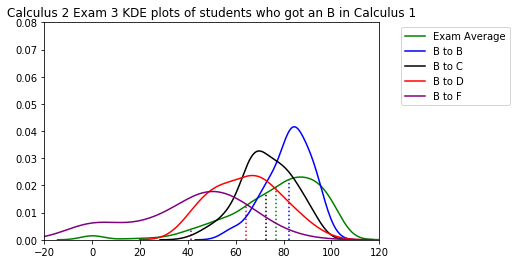

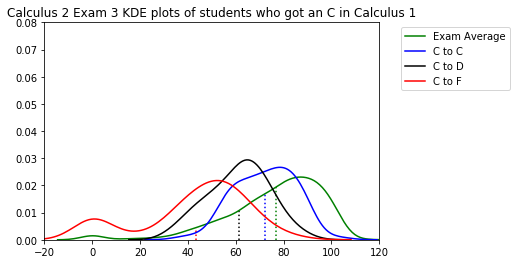

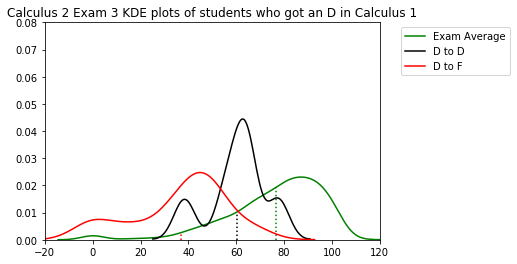

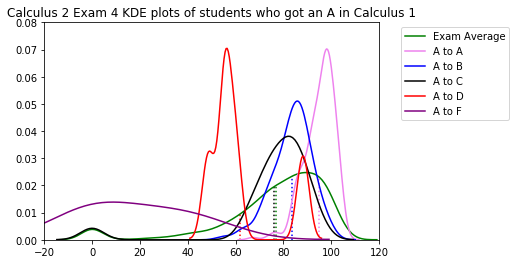

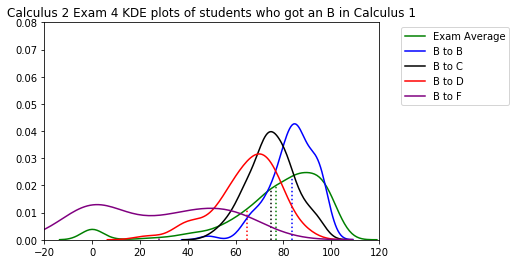

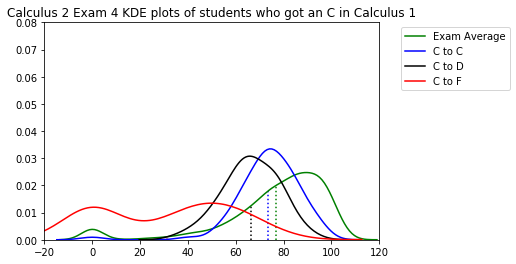

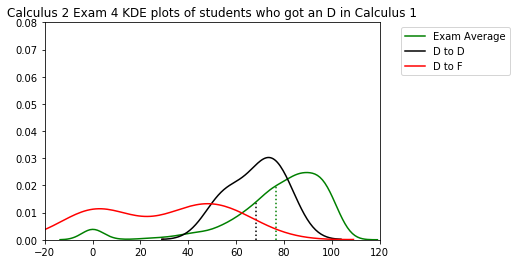

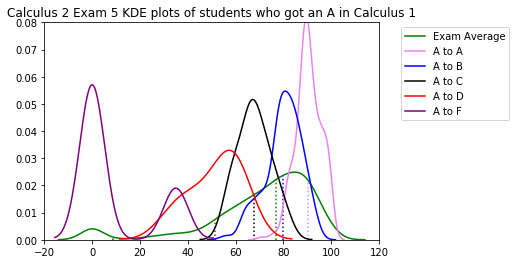

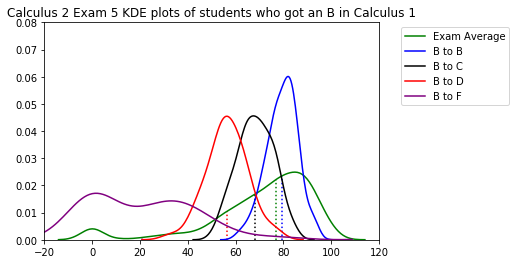

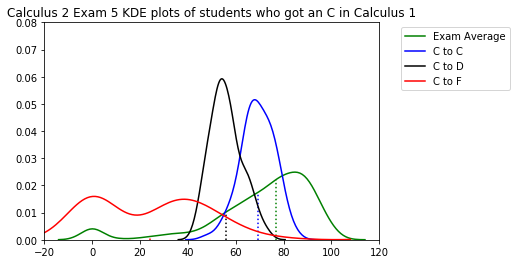

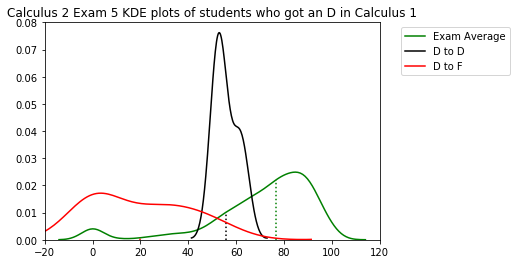

In [39]:
z = 1
for n in ['EXAM1.125', 'EXAM2.125', 'EXAM3.125', 'EXAM4.125','FINAL.125']:
    plt.ylim(0, .08)
    plt.xlim(-20, 120)
    ax = sns.kdeplot(question_3_df[n], shade=False, color='green')
    kdeline = ax.lines[0]
    mean3 = question_3_df['EXAM1.125'].mean()
    height = np.interp(mean3, kdeline.get_xdata(), kdeline.get_ydata())
    ax.vlines(mean3, 0, height, color='green', ls=':')
    ax.set_ylim(ymin=0)

    # A to A
    ax2 = sns.kdeplot(question_3_df.loc[(question_3_df['GRADE.125'] == 'A')&(question_3_df['GRADE.123'] == 'A')][n], color = 'violet', shade = False)
    kdeline = ax.lines[0]
    mean2 = question_3_df.loc[(question_3_df['GRADE.125'] == 'A')&(question_3_df['GRADE.123'] == 'A')][n].mean()
    height = np.interp(mean2, kdeline.get_xdata(), kdeline.get_ydata())
    ax2.vlines(mean2, 0, height, color='violet', ls=':')
    ax2.set_ylim(ymin=0)

    # A to B
    ax2 = sns.kdeplot(question_3_df.loc[(question_3_df['GRADE.125'] == 'B')&(question_3_df['GRADE.123'] == 'A')][n], color = 'blue', shade = False)
    kdeline = ax.lines[0]
    mean2 = question_3_df.loc[(question_3_df['GRADE.125'] == 'B')&(question_3_df['GRADE.123'] == 'A')][n].mean()
    height = np.interp(mean2, kdeline.get_xdata(), kdeline.get_ydata())
    ax2.vlines(mean2, 0, height, color='blue', ls=':')
    ax2.set_ylim(ymin=0)

    # A to C
    ax3 = sns.kdeplot(question_3_df.loc[(question_3_df['GRADE.125'] == 'C')&(question_3_df['GRADE.123'] == 'A')][n], color = 'black', shade = False)
    kdeline = ax.lines[0]
    mean = question_3_df.loc[(question_3_df['GRADE.125'] == 'C')&(question_3_df['GRADE.123'] == 'A')][n].mean()
    height = np.interp(mean, kdeline.get_xdata(), kdeline.get_ydata())
    ax3.vlines(mean, 0, height, color='black', ls=':')
    ax3.set_ylim(ymin=0)

    # A to D
    ax3 = sns.kdeplot(question_3_df.loc[(question_3_df['GRADE.125'] == 'D')&(question_3_df['GRADE.123'] == 'A')][n], color = 'red', shade = False)
    kdeline = ax.lines[0]
    mean = question_3_df.loc[(question_3_df['GRADE.125'] == 'D')&(question_3_df['GRADE.123'] == 'A')][n].mean()
    height = np.interp(mean, kdeline.get_xdata(), kdeline.get_ydata())
    ax3.vlines(mean, 0, height, color='red', ls=':')
    ax3.set_ylim(ymin=0)

    # A to F
    ax4 = sns.kdeplot(question_3_df.loc[(question_3_df['GRADE.125'] == 'F')&(question_3_df['GRADE.123'] == 'A')][n], color = 'purple', shade = False)
    kdeline = ax.lines[0]
    mean = question_3_df.loc[(question_3_df['GRADE.125'] == 'F')&(question_3_df['GRADE.123'] == 'A')][n].mean()
    height = np.interp(mean, kdeline.get_xdata(), kdeline.get_ydata())
    ax4.vlines(mean, 0, height, color='purple', ls=':')
    ax4.set_ylim(ymin=0)
    
    plt.legend(('Exam Average','A to A','A to B','A to C', 'A to D', 'A to F'), bbox_to_anchor = (1.05,1), loc = 'upper left', prop = fontP)
    plt.title('Calculus 2 Exam %d KDE plots of students who got an A in Calculus 1' %z)
    plt.show()
    
#####################################################
    plt.ylim(0, .08)
    plt.xlim(-20, 120)

    ax = sns.kdeplot(question_3_df[n], shade=False, color='green')
    kdeline = ax.lines[0]
    mean3 = question_3_df['EXAM1.125'].mean()
    height = np.interp(mean3, kdeline.get_xdata(), kdeline.get_ydata())
    ax.vlines(mean3, 0, height, color='green', ls=':')
    ax.set_ylim(ymin=0)

    # B to B
    ax2 = sns.kdeplot(question_3_df.loc[(question_3_df['GRADE.125'] == 'B')&(question_3_df['GRADE.123'] == 'B')][n], color = 'blue', shade = False)
    kdeline = ax.lines[0]
    mean2 = question_3_df.loc[(question_3_df['GRADE.125'] == 'B')&(question_3_df['GRADE.123'] == 'B')][n].mean()
    height = np.interp(mean2, kdeline.get_xdata(), kdeline.get_ydata())
    ax2.vlines(mean2, 0, height, color='blue', ls=':')
    ax2.set_ylim(ymin=0)

    # B to C

    ax3 = sns.kdeplot(question_3_df.loc[(question_3_df['GRADE.125'] == 'C')&(question_3_df['GRADE.123'] == 'B')][n], color = 'black', shade = False)
    kdeline = ax.lines[0]
    mean = question_3_df.loc[(question_3_df['GRADE.125'] == 'C')&(question_3_df['GRADE.123'] == 'B')][n].mean()
    height = np.interp(mean, kdeline.get_xdata(), kdeline.get_ydata())
    ax3.vlines(mean, 0, height, color='black', ls=':')
    ax3.set_ylim(ymin=0)

    # B to D
    ax3 = sns.kdeplot(question_3_df.loc[(question_3_df['GRADE.125'] == 'D')&(question_3_df['GRADE.123'] == 'B')][n], color = 'red', shade = False)
    kdeline = ax.lines[0]
    mean = question_3_df.loc[(question_3_df['GRADE.125'] == 'D')&(question_3_df['GRADE.123'] == 'B')][n].mean()
    height = np.interp(mean, kdeline.get_xdata(), kdeline.get_ydata())
    ax3.vlines(mean, 0, height, color='red', ls=':')
    ax3.set_ylim(ymin=0)

    # B to F
    ax3 = sns.kdeplot(question_3_df.loc[(question_3_df['GRADE.125'] == 'F')&(question_3_df['GRADE.123'] == 'B')][n], color = 'purple', shade = False)
    kdeline = ax.lines[0]
    mean = question_3_df.loc[(question_3_df['GRADE.125'] == 'F')&(question_3_df['GRADE.123'] == 'B')][n].mean()
    height = np.interp(mean, kdeline.get_xdata(), kdeline.get_ydata())
    ax3.vlines(mean, 0, height, color='purple', ls=':')
    ax3.set_ylim(ymin=0)



    plt.legend(('Exam Average','B to B','B to C', 'B to D', 'B to F'), bbox_to_anchor = (1.05,1), loc = 'upper left', prop = fontP)
    plt.title('Calculus 2 Exam %d KDE plots of students who got an B in Calculus 1' %z)
    plt.show()
    
    
######################################################
    plt.ylim(0, .08)
    plt.xlim(-20, 120)

    ax = sns.kdeplot(question_3_df[n], shade=False, color='green')
    kdeline = ax.lines[0]
    mean3 = question_3_df['EXAM1.125'].mean()
    height = np.interp(mean3, kdeline.get_xdata(), kdeline.get_ydata())
    ax.vlines(mean3, 0, height, color='green', ls=':')
    ax.set_ylim(ymin=0)

    # C to C
    ax2 = sns.kdeplot(question_3_df.loc[(question_3_df['GRADE.125'] == 'C')&(question_3_df['GRADE.123'] == 'C')][n], color = 'blue', shade = False)
    kdeline = ax.lines[0]
    mean2 = question_3_df.loc[(question_3_df['GRADE.125'] == 'C')&(question_3_df['GRADE.123'] == 'C')][n].mean()
    height = np.interp(mean2, kdeline.get_xdata(), kdeline.get_ydata())
    ax2.vlines(mean2, 0, height, color='blue', ls=':')
    ax2.set_ylim(ymin=0)

    # C to D

    ax3 = sns.kdeplot(question_3_df.loc[(question_3_df['GRADE.125'] == 'D')&(question_3_df['GRADE.123'] == 'C')][n], color = 'black', shade = False)
    kdeline = ax.lines[0]
    mean = question_3_df.loc[(question_3_df['GRADE.125'] == 'D')&(question_3_df['GRADE.123'] == 'C')][n].mean()
    height = np.interp(mean, kdeline.get_xdata(), kdeline.get_ydata())
    ax3.vlines(mean, 0, height, color='black', ls=':')
    ax3.set_ylim(ymin=0)

    # C to F
    ax3 = sns.kdeplot(question_3_df.loc[(question_3_df['GRADE.125'] == 'F')&(question_3_df['GRADE.123'] == 'C')][n], color = 'red', shade = False)
    kdeline = ax.lines[0]
    mean = question_3_df.loc[(question_3_df['GRADE.125'] == 'F')&(question_3_df['GRADE.123'] == 'C')][n].mean()
    height = np.interp(mean, kdeline.get_xdata(), kdeline.get_ydata())
    ax3.vlines(mean, 0, height, color='red', ls=':')
    ax3.set_ylim(ymin=0)


    plt.legend(('Exam Average','C to C','C to D', 'C to F'), bbox_to_anchor = (1.05,1), loc = 'upper left', prop = fontP)
    plt.title('Calculus 2 Exam %d KDE plots of students who got an C in Calculus 1' %z)
    plt.show()

    
###############################################
    plt.ylim(0, .08)
    plt.xlim(-20, 120)

    ax = sns.kdeplot(question_3_df[n], shade=False, color='green')
    kdeline = ax.lines[0]
    mean3 = question_3_df['EXAM1.125'].mean()
    height = np.interp(mean3, kdeline.get_xdata(), kdeline.get_ydata())
    ax.vlines(mean3, 0, height, color='green', ls=':')
    ax.set_ylim(ymin=0)

    # D to D
    ax3 = sns.kdeplot(question_3_df.loc[(question_3_df['GRADE.125'] == 'D')&(question_3_df['GRADE.123'] == 'D')][n], color = 'black', shade = False)
    kdeline = ax.lines[0]
    mean = question_3_df.loc[(question_3_df['GRADE.125'] == 'D')&(question_3_df['GRADE.123'] == 'D')][n].mean()
    height = np.interp(mean, kdeline.get_xdata(), kdeline.get_ydata())
    ax3.vlines(mean, 0, height, color='black', ls=':')
    ax3.set_ylim(ymin=0)

    # D to F
    ax3 = sns.kdeplot(question_3_df.loc[(question_3_df['GRADE.125'] == 'F')&(question_3_df['GRADE.123'] == 'D')][n], color = 'red', shade = False)
    kdeline = ax.lines[0]
    mean = question_3_df.loc[(question_3_df['GRADE.125'] == 'F')&(question_3_df['GRADE.123'] == 'D')][n].mean()
    height = np.interp(mean, kdeline.get_xdata(), kdeline.get_ydata())
    ax3.vlines(mean, 0, height, color='red', ls=':')
    ax3.set_ylim(ymin=0)


    plt.legend(('Exam Average','D to D','D to F'), bbox_to_anchor = (1.05,1), loc = 'upper left', prop = fontP)
    plt.title('Calculus 2 Exam %d KDE plots of students who got an D in Calculus 1' %z)   
    plt.show()
    z += 1


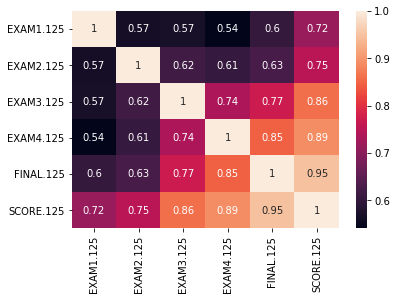

In [38]:
corrMatrix = C1_to_C2[['EXAM1.125','EXAM2.125','EXAM3.125','EXAM4.125','FINAL.125','SCORE.125']].corr()
sns.heatmap(corrMatrix, annot = True)
plt.show()
